# The BIG SIX Final Project - Predict E-Commerce Customer Churn

## Stage 1 - Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 'E Comm')
df_stg1 = df.copy()
df_stg1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df_stg1['CityTier'] = df_stg1['CityTier'].astype('str')

### Descriptive Statistics

In [5]:
df_stg1.describe()

,CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
df_stg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
#assign into nums and cats features
nums = ['Churn','Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
cats = ['PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

In [8]:
df_stg1[nums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   WarehouseToHome              5379 non-null   float64
 3   HourSpendOnApp               5375 non-null   float64
 4   NumberOfDeviceRegistered     5630 non-null   int64  
 5   SatisfactionScore            5630 non-null   int64  
 6   NumberOfAddress              5630 non-null   int64  
 7   Complain                     5630 non-null   int64  
 8   OrderAmountHikeFromlastYear  5365 non-null   float64
 9   CouponUsed                   5374 non-null   float64
 10  OrderCount                   5372 non-null   float64
 11  DaySinceLastOrder            5323 non-null   float64
 12  CashbackAmount               5630 non-null   float64
dtypes: float64(8), int

In [9]:
df_stg1[nums].describe()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [10]:
df_stg1[cats].describe()

,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630,5630
unique,3,3,7,2,6,3
top,Mobile Phone,1,Debit Card,Male,Laptop & Accessory,Married
freq,2765,3666,2314,3384,2050,2986


In [11]:
df_stg1[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PreferredLoginDevice  5630 non-null   object
 1   CityTier              5630 non-null   object
 2   PreferredPaymentMode  5630 non-null   object
 3   Gender                5630 non-null   object
 4   PreferedOrderCat      5630 non-null   object
 5   MaritalStatus         5630 non-null   object
dtypes: object(6)
memory usage: 264.0+ KB


A. semua tipe data sesuai

B. kolom kosong ada di (Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder)

C. Tidak terdapat keanehan pada nilai masing-masing Feature

D. pada kolom Number Of Address, pada nilai max terdapat 22 address pada 1 user <br>

### Univariate Analysis

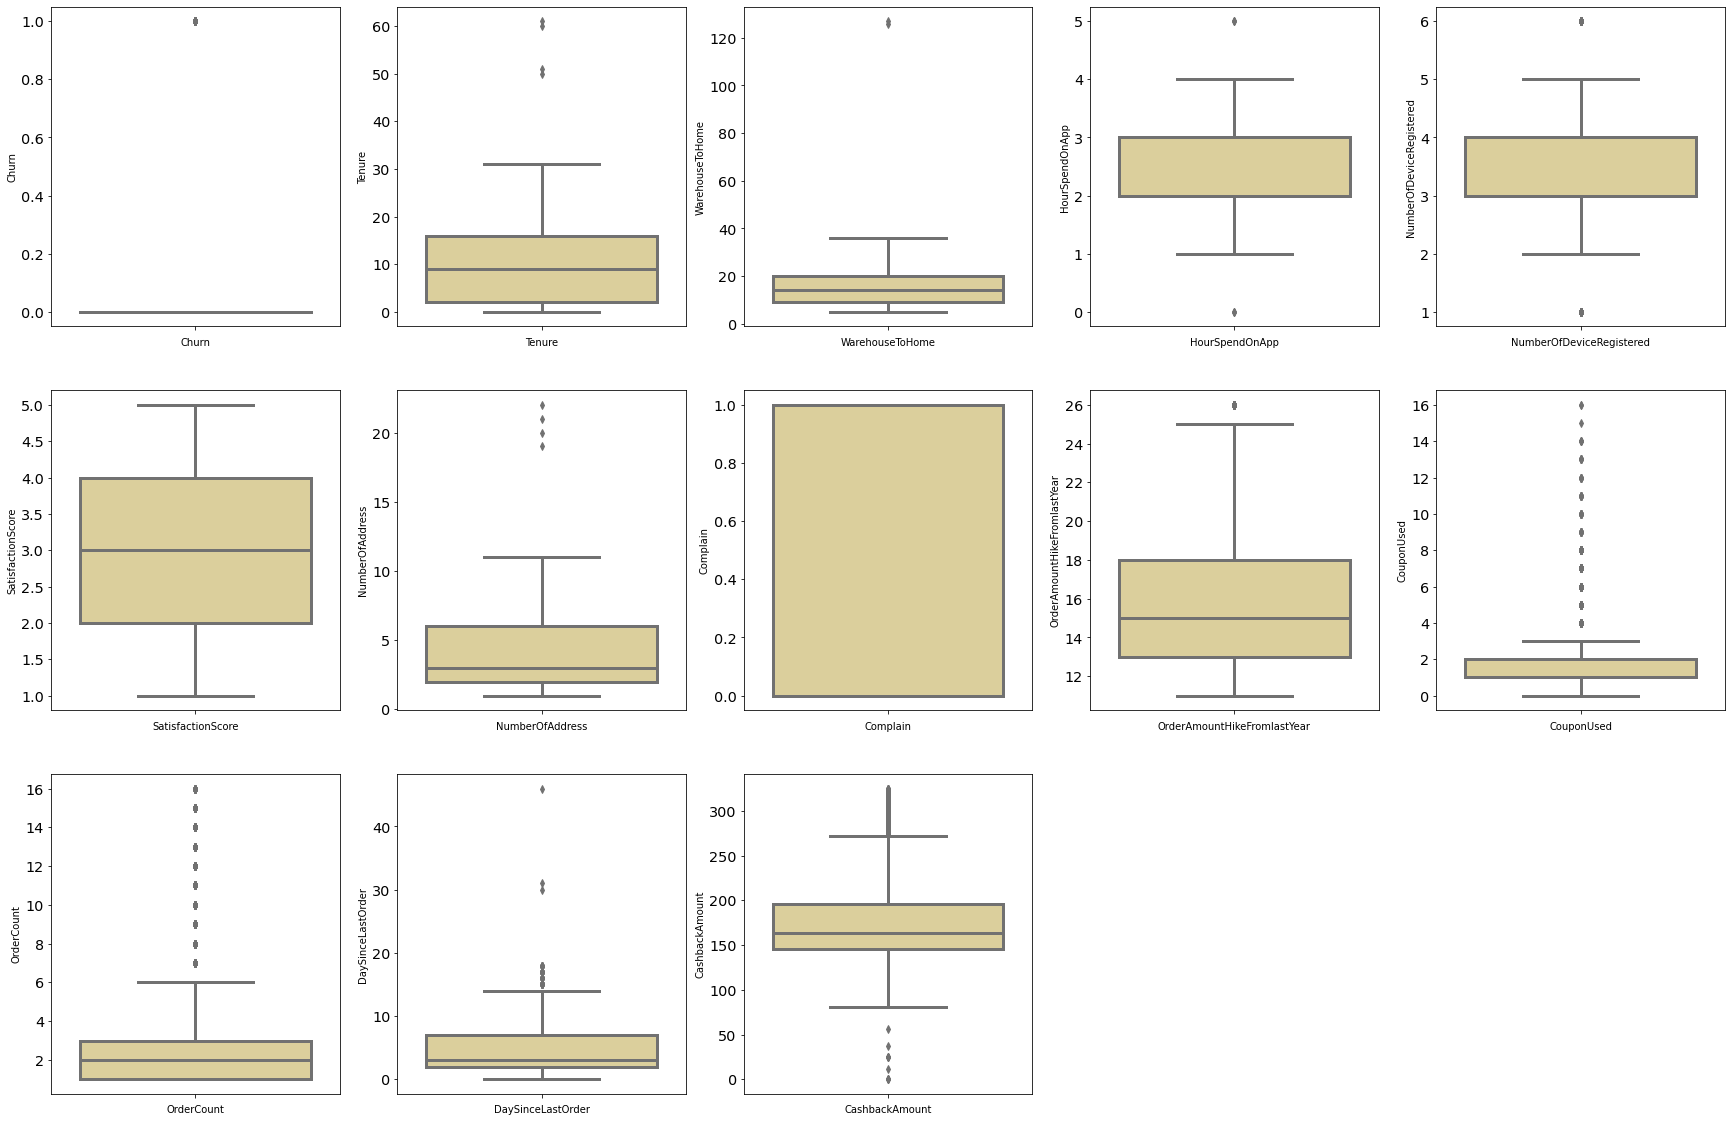

In [12]:
plt.figure(figsize=(30,20))
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df_stg1[features[i]], color='#e5d692', orient='v')
    plt.xlabel(features[i])

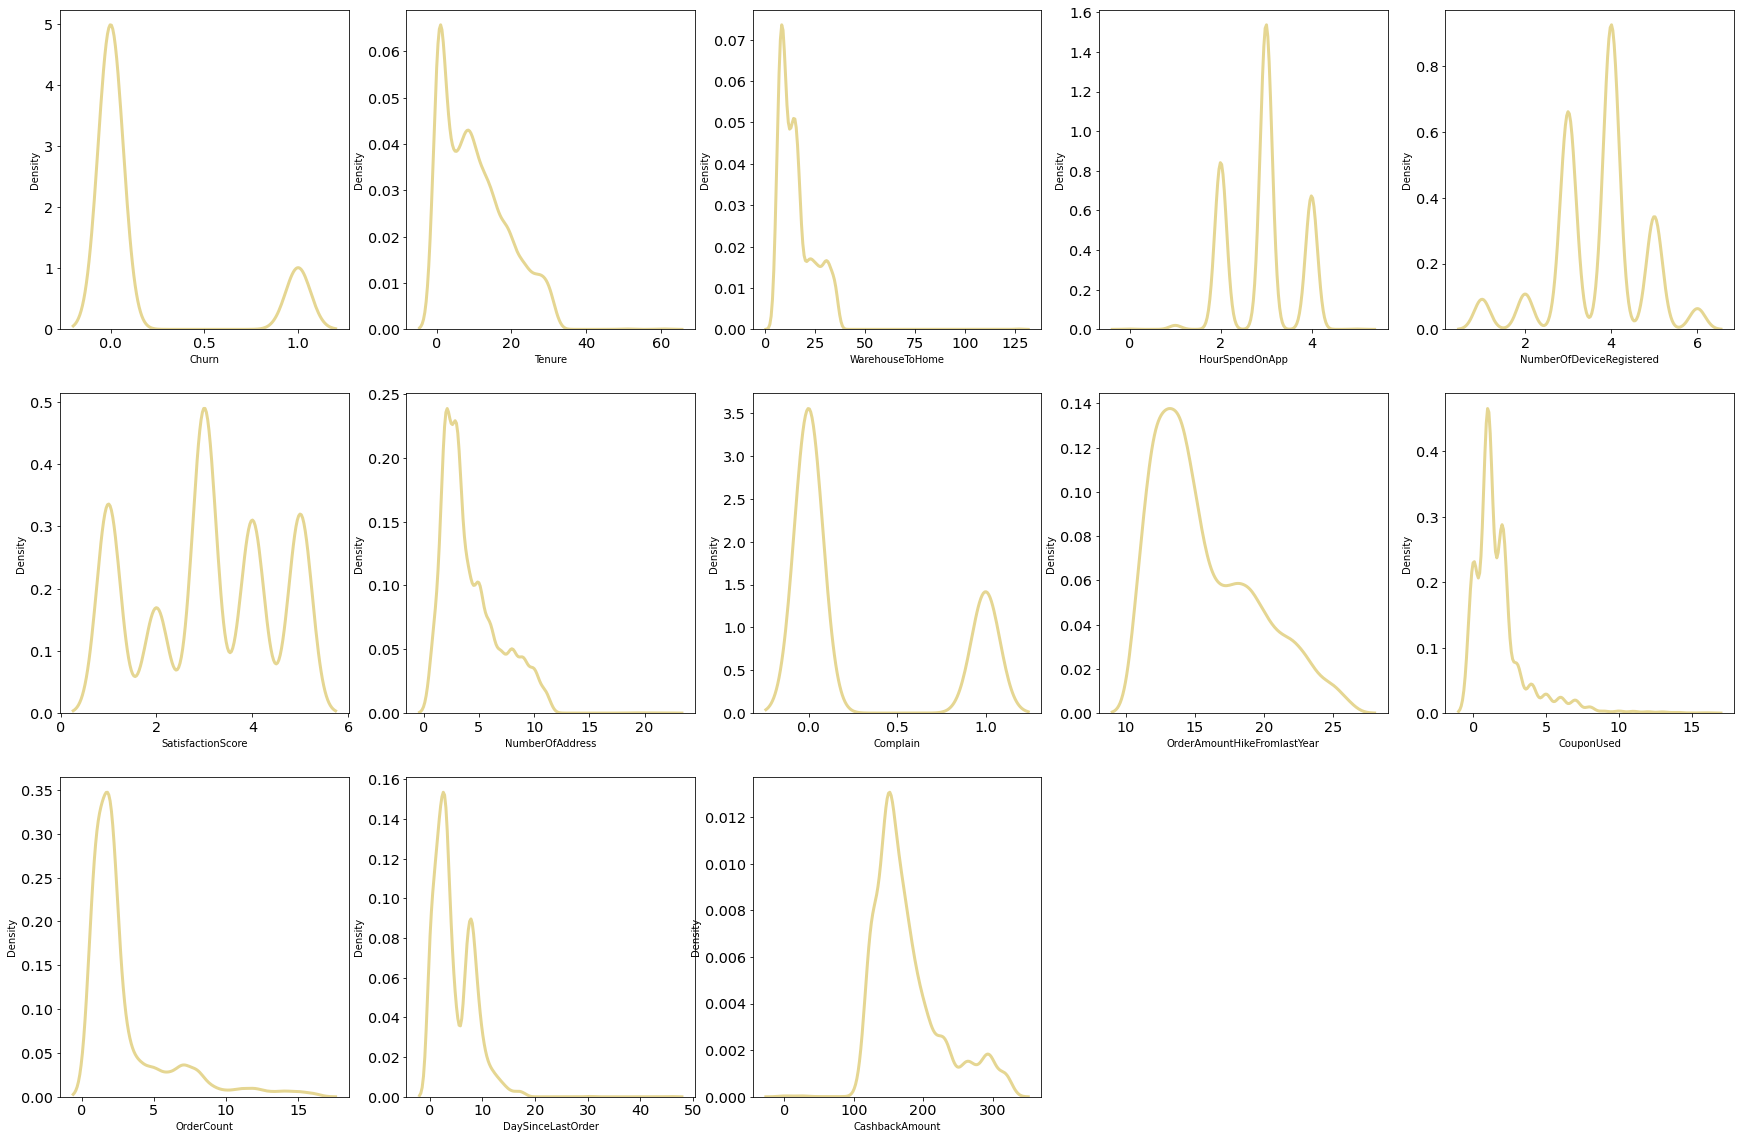

In [13]:
features = nums
plt.figure(figsize=(30, 20))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df_stg1[features[i]], color='#e5d692')
    plt.xlabel(features[i])

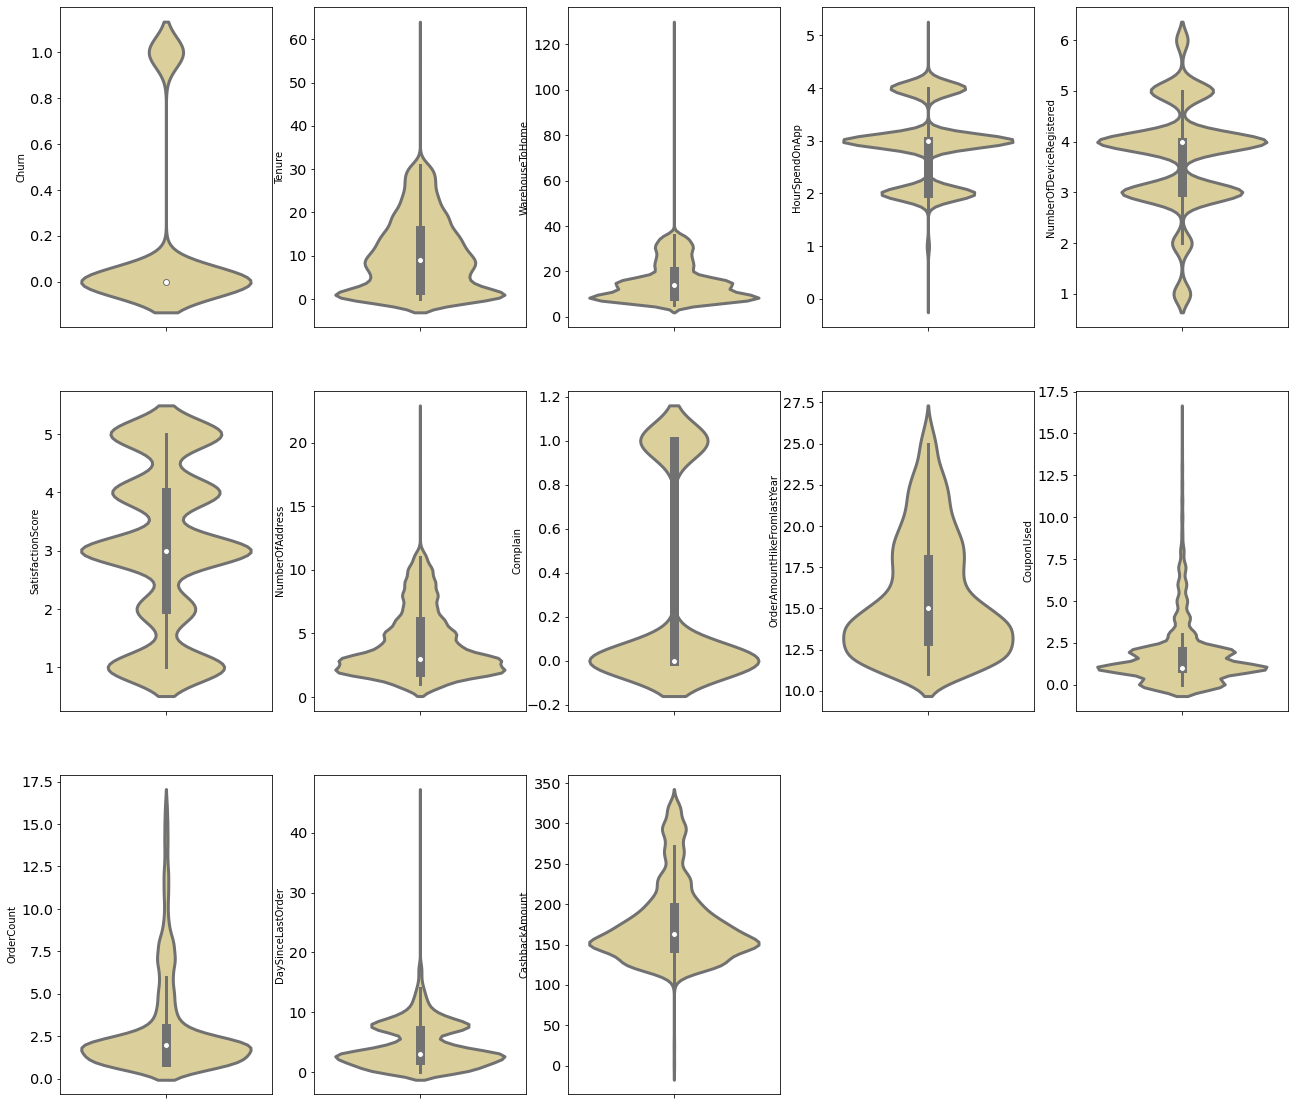

In [14]:
plt.figure(figsize=(22, 20))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=df_stg1[nums[i]], color='#e5d692', orient='v')

grafik yang menarik dari data numeric adalah :
1. tenure : right skewed, ada outlier disisi kanan
2. warehouse to home : right skewed, ada outlier disisi kanan
3. number of address : right skewed, ada outlier disisi kanan
4. days since last order : right skewed, ada outlier disisi kanan
5. cashback amount : right skewed, ada outlier di sisi kiri dan kanan
6. Order Amount Hike From last Year : right skewed, ada outlier disisi kanan
7. Coupon Used: right skewed, ada outlier disisi kanan
8. Order Count : right skewed, ada outlier disisi kanan
9. Grafik Complain adalah binary, sehingga tidak perlu kita perhatikan distribusinya

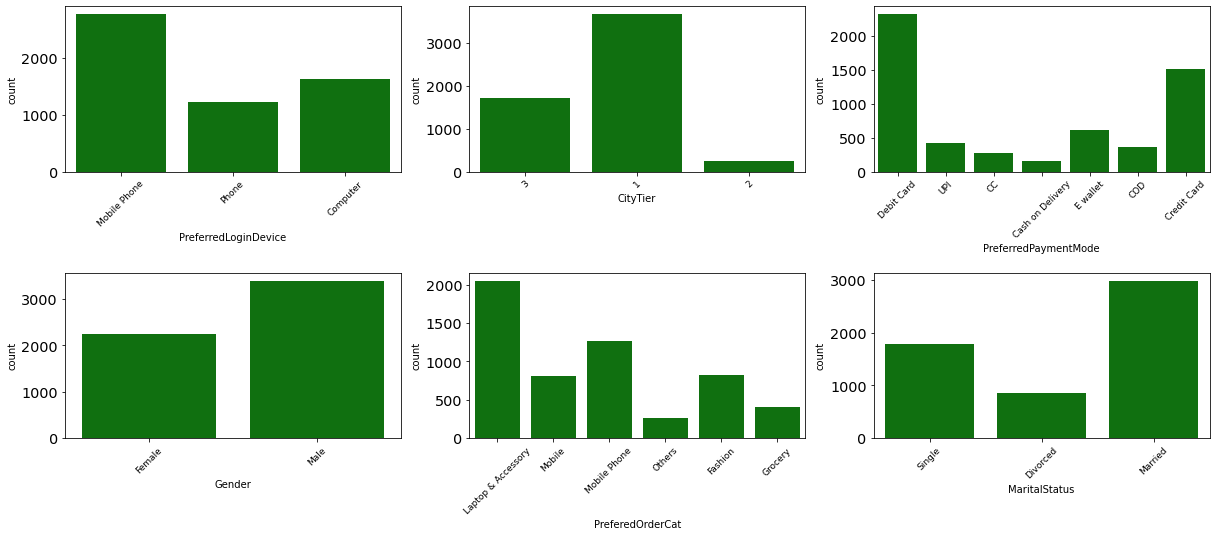

In [15]:
plt.figure(figsize=(17,10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df_stg1[cats[i]], color='green', orient='v')
    plt.xticks(fontsize=9, rotation=45)
    plt.tight_layout()

1. Pada feature Prefer Order Cat terdapat 2 variabel yang mirip yaitu, Phone dan Mobile Phone. Kita perlu melakukan label handling pada feature ini
2. Pada Feature Preferred Payment Mode, terdapat variabel yang mirip, yaitu CC dengan Credit Card dan COD dengan Cash On Delivery. Kita perlu melakukan label handling pada feature ini

### Multivariate Analysis

In [16]:
df_stg1.corr()

,CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217129
Churn,-0.019083,1.000000,-0.349408,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,0.029952,-0.349408,1.000000,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
WarehouseToHome,0.058909,0.076630,-0.018218,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.598417,0.018675,-0.021226,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,-0.033146,0.105481,-0.013903,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.160814,0.043931,0.237666,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,-0.009944,0.250188,-0.021268,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525
OrderAmountHikeFromlastYear,0.117243,-0.010058,0.005825,0.038795,0.106843,0.069475,-0.027730,0.015533,-0.004529,1.000000,0.033201,0.023101,0.006003,0.017869


Text(0.5, 1.0, 'Korelasi')

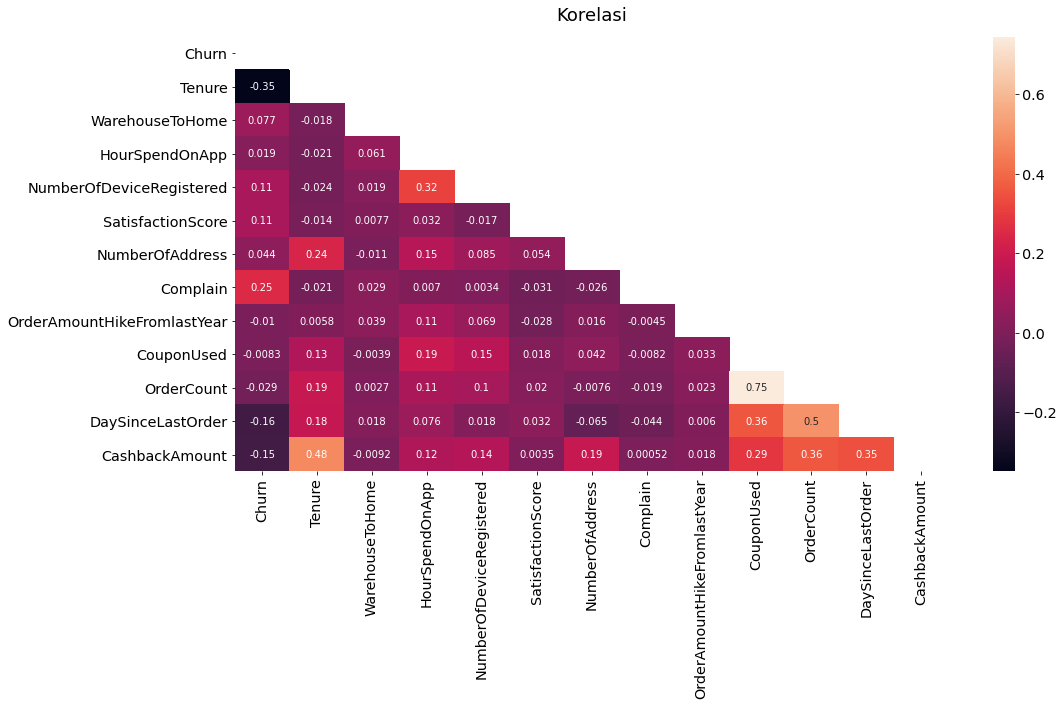

In [17]:
mask = np.triu(np.ones_like(df_stg1[nums].corr(), dtype=np.bool_))

plt.figure(figsize=(16, 8))
heatmaps=sns.heatmap(df_stg1[nums].corr(),annot=True, mask=mask)
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

Dari correlation heatmap diatas, tidak terlihat adanya multikolinearitas pada masing-masing feature (variabel independen) kita

### Business Insight

+ <b>Churn Rate</b>

In [18]:
ch = df.groupby('Churn').agg({'CustomerID':'nunique'}).reset_index()
ch = ch.replace({0:'Not Churn',
              1:'Churn'})
ch['Total_Customer'] = df['CustomerID'].nunique()
ch['Ratio Churn'] = ch['CustomerID'] / ch['Total_Customer'] * 100.0
ch

,Churn,CustomerID,Total_Customer,Ratio Churn
0,Not Churn,4682,5630,83.161634
1,Churn,948,5630,16.838366


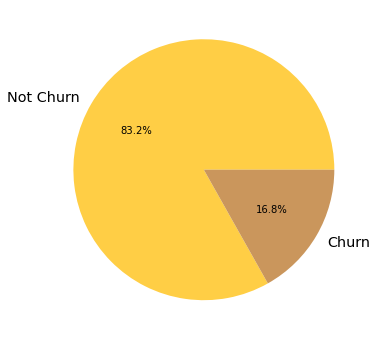

In [19]:
plt.figure(figsize=(12,6))
ax = plt.pie('CustomerID',labels='Churn',autopct='%.1f%%',data=ch,colors=['#FFCE45','#CA965C'],textprops={'color':"black"});

#plt.savefig('Churn.png',transparent=True)

Sebanyak 16,8 persen dari customer kita churn. Mari kita lihat dari masing-masing feature.

+ <b>Churn by Tenure<b>

In [20]:
df_stg1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


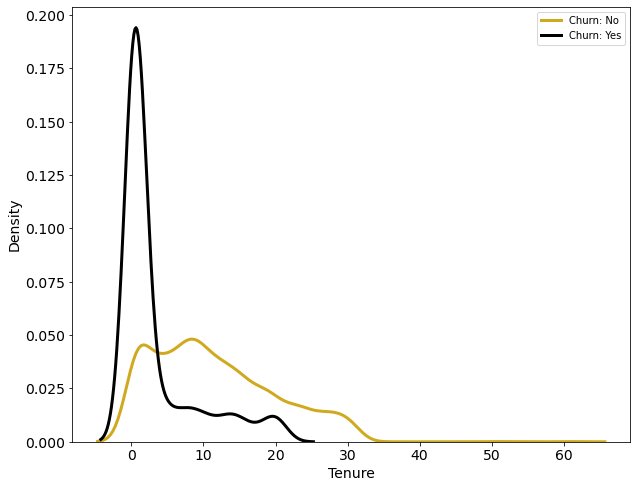

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= '#d1a91f', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= '#000000', label= 'Churn: Yes', ax=ax)

ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper right')

#plt.savefig('tenure.png',transparent=True)

Terdapat kondisi dimana customer churn sangat tinggi pada 3 minggu pertama.

+ <b> Gender and Churn <b>

In [22]:
#gender
df_group2=df.groupby(['Gender']).agg({'CustomerID':'count'}).reset_index()
df_group2['ratio']=df_group2['CustomerID'].apply(lambda x:round( x*100.0/(df_group2['CustomerID'].sum()),2))
df_group2df_group2=df_stg1.groupby(['Gender','Churn']).agg({'CustomerID':'count'}).reset_index()
df_group2['ratio']=df_group2['CustomerID'].apply(lambda x:round( x*100.0/(df_group2['CustomerID'].sum()),2))
df_group2

,Gender,CustomerID,ratio
0,Female,2246,39.89
1,Male,3384,60.11


Text(0.5, 0, ' ')

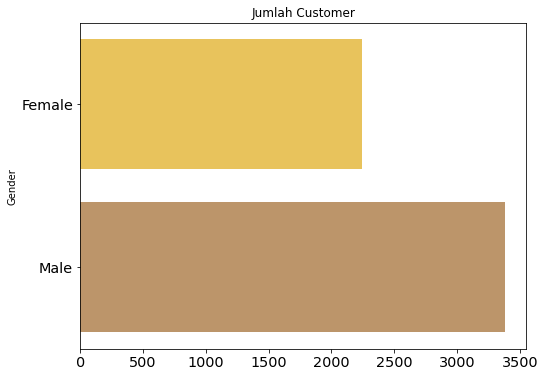

In [23]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_group2,x='CustomerID',y='Gender',palette=['#FFCE45','#CA965C'])
plt.title('Jumlah Customer')
plt.xlabel(' ')

#plt.savefig('Gender.png',transparent=True)

In [24]:
#gender
df_group3=df_stg1.groupby(['Gender','Churn']).agg({'CustomerID':'count'}).reset_index()
df_group3['ratio']=df_group3['CustomerID'].apply(lambda x:round( x*100.0/(df_group3['CustomerID'].sum()),2))
aw = df_group3[df_group3['Churn'] == 1]
aw

,Gender,Churn,CustomerID,ratio
1,Female,1,348,6.18
3,Male,1,600,10.66


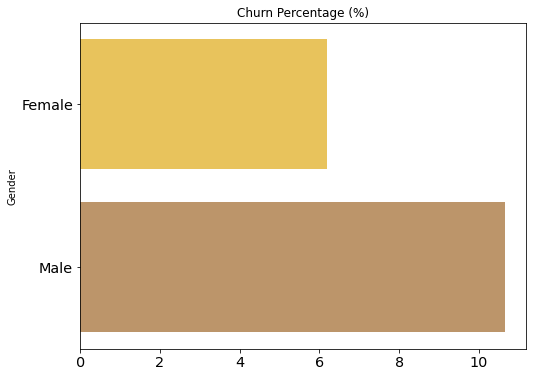

In [25]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=aw,x='ratio',y='Gender',palette=['#FFCE45','#CA965C'])
plt.title('Churn Percentage (%)')
plt.xlabel(' ')
plt.savefig('Gender rate.png',transparent=True)

Demografi customer kita kebanyakan adalah laki-laki dengan rasio 6:4 terhadap perempuan, akan tetapi churn rate laki-laki juga lebih tinggi yaitu 10% dibandingkan perempuan yang hanya 6%

+ <b> Payment Mode and Churn <b>

In [26]:
df_group4=df.groupby(['PreferredPaymentMode']).agg({'CustomerID':'count'}).reset_index()
df_group4['ratio']=df_group4['CustomerID'].apply(lambda x:round( x*100.0/(df_group4['CustomerID'].sum()),2))
df_group4

,PreferredPaymentMode,CustomerID,ratio
0,CC,273,4.85
1,COD,365,6.48
2,Cash on Delivery,149,2.65
3,Credit Card,1501,26.66
4,Debit Card,2314,41.10
5,E wallet,614,10.91
6,UPI,414,7.35


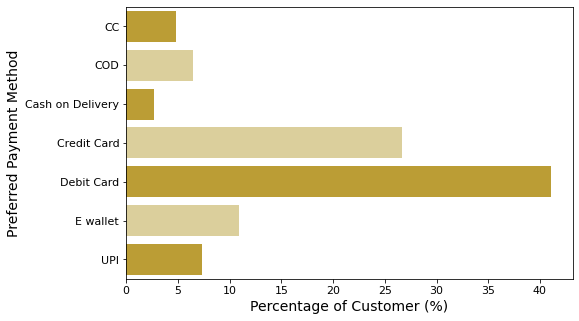

In [27]:
#preferedpayment
plt.figure(figsize=(8,5))
ax = sns.barplot (y='PreferredPaymentMode', x='ratio',palette=['#d1a91f','#e5d692'], data = df_group4)
ax.set_ylabel('Preferred Payment Method', fontsize=14) # y axis label
ax.set_xlabel('Percentage of Customer (%)',fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 11)

#plt.savefig('Payment Mode.png',transparent=True)

In [28]:
df_group5=df.groupby(['PreferredPaymentMode','Churn']).agg({'CustomerID':'count'}).reset_index()
df_group5['ratio']=df_group5['CustomerID'].apply(lambda x:round( x*100.0/(df_group5['CustomerID'].sum()),2))
df_group5 = df_group5[df_group5['Churn'] == 1]
df_group5

,PreferredPaymentMode,Churn,CustomerID,ratio
1,CC,1,59,1.05
3,COD,1,105,1.87
5,Cash on Delivery,1,23,0.41
7,Credit Card,1,193,3.43
9,Debit Card,1,356,6.32
11,E wallet,1,140,2.49
13,UPI,1,72,1.28


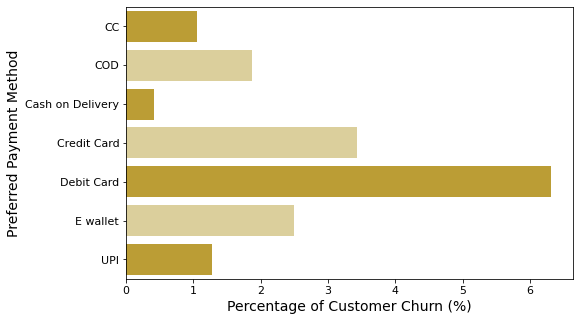

In [29]:
plt.figure(figsize=(8,5))
ax = sns.barplot (y='PreferredPaymentMode', x='ratio',palette=['#d1a91f','#e5d692'], data = df_group5)
ax.set_ylabel('Preferred Payment Method', fontsize=14) # y axis label
ax.set_xlabel('Percentage of Customer Churn (%)',fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 11)

#plt.savefig('Payment Mode Churn.png',transparent=True)

Meskipun masih terhadap mislabeled data, akan tetapi bisa dilihat debit card merupakan metode pembayaran paling favorit, diikuti dengan credit card. Akan tetapi debit card juga memiliki churn rate yang paling besar

+ <b> Complain and Churn <b>

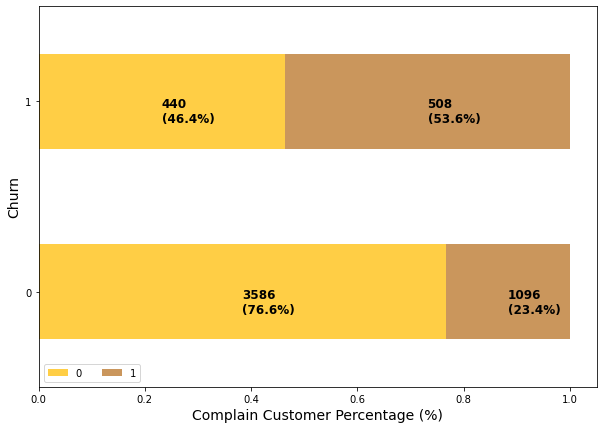

In [30]:
cross_tab_prop = pd.crosstab(index=df['Churn'],
                             columns=df['Complain'],
                             normalize="index")
cross_tab = pd.crosstab(index=df['Churn'],
                             columns=df['Complain'])
cross_tab
cross_tab_prop.plot(kind='barh', 
                        stacked=True, 
                        color=['#FFCE45','#CA965C'], 
                        figsize=(10, 7))

plt.legend(loc="lower left", ncol=2)
plt.ylabel("Churn",fontsize=14)
plt.xlabel("Complain Customer Percentage (%)",fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

#plt.savefig('Complain churn',transparent=True)

Dilihat dari customer yang churn, separuhnya adalah customer yang complain. Hal ini tentu menjadi perhatian khusus. 

+ <b> Prefered Order Category and Churn <b>

In [31]:
df_group6=df.groupby(['PreferedOrderCat']).agg({'CustomerID':'count'}).reset_index()
df_group6['ratio']=df_group6['CustomerID'].apply(lambda x:round( x*100.0/(df_group6['CustomerID'].sum()),2))
df_group6

,PreferedOrderCat,CustomerID,ratio
0,Fashion,826,14.67
1,Grocery,410,7.28
2,Laptop & Accessory,2050,36.41
3,Mobile,809,14.37
4,Mobile Phone,1271,22.58
5,Others,264,4.69


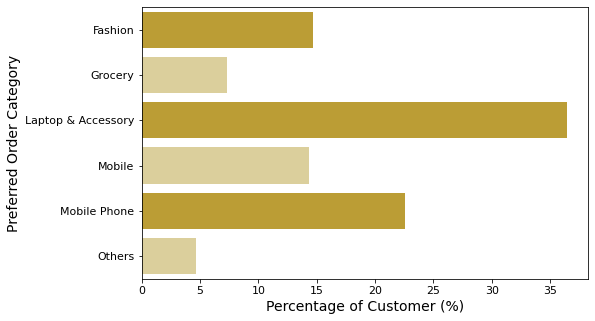

In [32]:
#preferedordercat
plt.figure(figsize=(8,5))
ax = sns.barplot (y='PreferedOrderCat', x='ratio',palette=['#d1a91f','#e5d692'], data = df_group6)
ax.set_ylabel('Preferred Order Category', fontsize=14) # y axis label
ax.set_xlabel('Percentage of Customer (%)',fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 11)

#plt.savefig('Order Cat.png',transparent=True)

In [33]:
df_group7=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'count'}).reset_index()
df_group7['ratio']=df_group7['CustomerID'].apply(lambda x:round( x*100.0/(df_group7['CustomerID'].sum()),2))
df_group7 = df_group7[df_group7['Churn'] == 1]
df_group7

,PreferedOrderCat,Churn,CustomerID,ratio
1,Fashion,1,128,2.27
3,Grocery,1,20,0.36
5,Laptop & Accessory,1,210,3.73
7,Mobile,1,220,3.91
9,Mobile Phone,1,350,6.22
11,Others,1,20,0.36


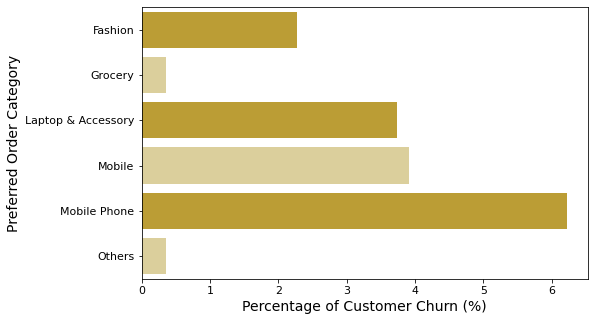

In [34]:
#preferedordercat
plt.figure(figsize=(8,5))
ax = sns.barplot (y='PreferedOrderCat', x='ratio',palette=['#d1a91f','#e5d692'], data = df_group7)
ax.set_ylabel('Preferred Order Category', fontsize=14) # y axis label
ax.set_xlabel('Percentage of Customer Churn (%)',fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 11)

#plt.savefig('Order Cat Churn.png',transparent=True)

Jika dilihat dari order category, Laptop dan accesory dan mobile phone menjadi category yang favorit pada ecommerce kita, akan tetapi customer dengan prefered order category mobile phone sangat signifikan lebih tinggi dari yang lainnya. Kita harus mencari tahu lebih dalam penyebab customer churn dari kategori ini.

+ <b> Day Since Last Order and Churn <b>

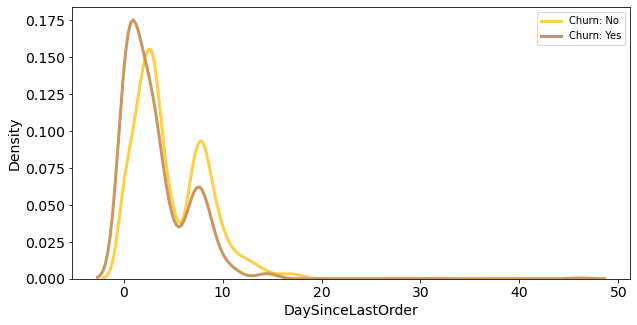

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['DaySinceLastOrder'].dropna(), color= '#FFCE45', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['DaySinceLastOrder'].dropna(), color= '#CA965C', label= 'Churn: Yes', ax=ax)

ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('DaySinceLastOrder', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper right')


plt.savefig('Last Order churn',transparent=True)

+ <b> Day Since Last Order and Churn </b>

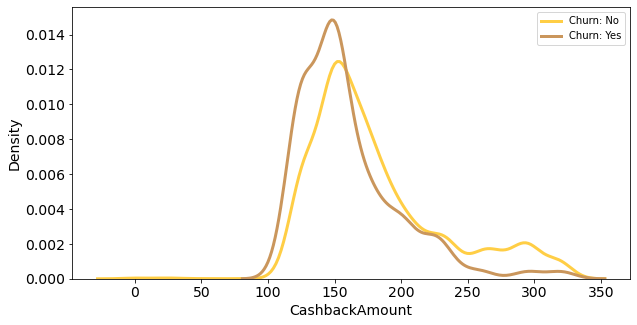

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['CashbackAmount'].dropna(), color= '#FFCE45', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['CashbackAmount'].dropna(), color= '#CA965C', label= 'Churn: Yes', ax=ax)

ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('CashbackAmount', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper right')


#plt.savefig('Cashback amount churn',transparent=True)

+ <b> Marital Status and Churn </b>

In [37]:
df_group8=df.groupby(['MaritalStatus']).agg({'CustomerID':'count'}).reset_index()
df_group8['ratio']=df_group8['CustomerID'].apply(lambda x:round( x*100.0/(df_group8['CustomerID'].sum()),2))
df_group8

,MaritalStatus,CustomerID,ratio
0,Divorced,848,15.06
1,Married,2986,53.04
2,Single,1796,31.90


Text(0.5, 0, ' ')

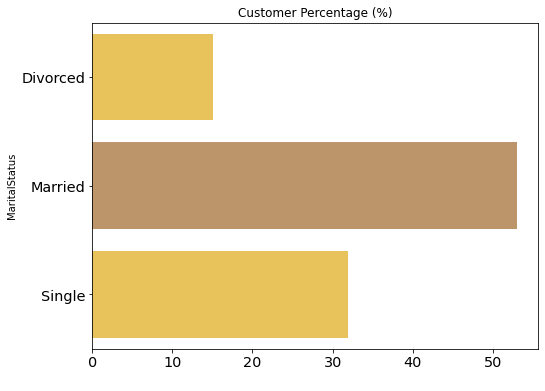

In [38]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_group8,x='ratio',y='MaritalStatus',palette=['#FFCE45','#CA965C'])
plt.title('Customer Percentage (%)')
plt.xlabel(' ')
#plt.savefig('maritalstatus.png',transparent=True)

+ <b> Hour Spend on App and Churn </b>

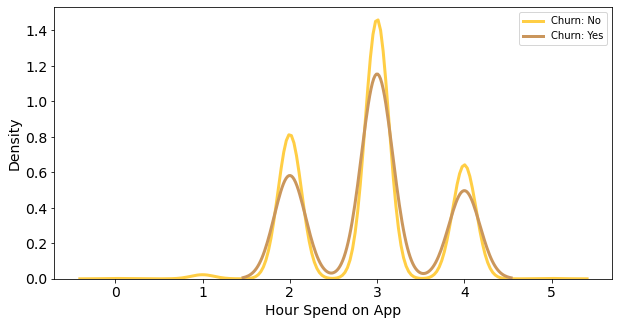

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['HourSpendOnApp'].dropna(), color= '#FFCE45', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['HourSpendOnApp'].dropna(), color= '#CA965C', label= 'Churn: Yes', ax=ax)

plt.legend(loc='upper right')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Hour Spend on App',fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
#plt.savefig('hour spend on app.png',transparent=True)



+<b> Number of Device Registered and Churn </b>

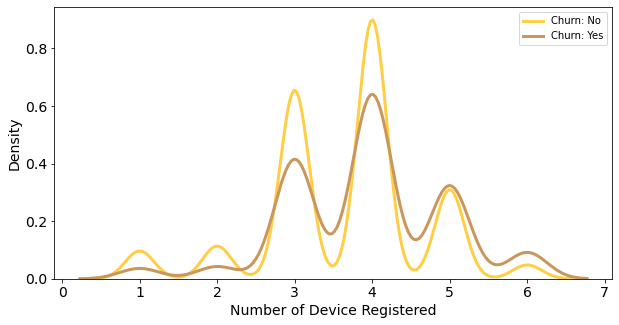

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['NumberOfDeviceRegistered'].dropna(), color= '#FFCE45', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['NumberOfDeviceRegistered'].dropna(), color= '#CA965C', label= 'Churn: Yes', ax=ax)

plt.legend(loc='upper right')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Number of Device Registered',fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig('numberdeviceregistered.png',transparent=True)

#### Summary Business Insight

1. Terdapat kondisi critical dimana kecenderungan customer churn di 2 minggu awal mengunakan layanan kita.
2. Jumlah customer Pria lebih banyak daripada Wanita
3. Jenis Pembayaran Debit dan Credit Card menjadi primadona
4. Churn rate tinggi pada customer yang complain 
5. Kategori laptop&accesory dan mobile Phone menjadi yang paling banyak diburu


## Stage 2 - Data PreProcessing

### Data Preprocessing and Feature Engineering

+ <b> Data Exploration <b>

In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

pd.set_option("max_column",100)
pd.set_option("max_colwidth",1000)
pd.set_option("max_row",1000)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [43]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [44]:
nums = ['Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
cats = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

+ <b> Feature Target <b>

Kolom target yang akan digunakan adalah kolom Churn

In [45]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

+ <b> Handling Missing/Null Value <b>

In [46]:
# cek jumlah missing data
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Strategi dalam imputasi data null values:
1. `Tenure` distribusi datanya right skewed, kita menggunakan modus
2. `WarehouseToHome` distribusi datanya juga right skewed, kita menggunakan modus
3. `HourSpendOnApp` distribusi datanya berbentuk trimodal, kita menggunakan modus
4. `OrderAmountHikeFromlastYear` distribusi datanya right skewed, kita menggunakan modus
5. `CouponUsed` distribusi datanya right skewed, kita menggunakan modus
6. `OrderCount` distribusi datanya right skewed, kita menggunakan modus
7. `DaySinceLastOrder` distribusi datanya right skewed, kita menggunakan modus

In [47]:
# Impute Tenure dan DaySinceLastOrder dengan modus
df['Tenure'].fillna(df['Tenure'].mode()[0], inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].mode()[0], inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mode()[0], inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].mode()[0], inplace=True)
df['OrderCount'].fillna(df['OrderCount'].mode()[0], inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].mode()[0], inplace=True)

In [48]:
# cek jumlah missing data setelah preprocessing
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

+ <b>Handling Duplicate</b>

In [49]:
df.duplicated().sum()

0

+ <b> Handling Mislabeled Data <b>

In [50]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [51]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'COD':'Cash on Delivery'})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC':'Credit Card'})
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [52]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [53]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [54]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [55]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})
df['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [56]:
cats_updated = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'Gender']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64
------------------------------ 

value counts of column PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64
------------------------------ 

value counts of column PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
------------------------------ 

value counts of column MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
------------------------------ 

value counts of column Gender
Male      3384
Female    2246
Name: Gender, dtype: int64
------------------------------ 



#### Outliers Handling
Kita akan menggunakan Z-score filtering

In [57]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in df[nums]:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


+ <b>Strategi encoding </b><br>
1. `PreferredLoginDevice` , `PreferredPaymentMode`, `PreferedOrderCat` & `MaritalStatus` \: One Hot Encoding 
2. `CityTier` dan `SatisfactionScore` sudah berbentuk label encoding/ordinal encoding

In [58]:
df_stg2 = pd.get_dummies(df,columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus'])
df_stg2

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,Female,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,50002,1,1.0,1,8.0,Male,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
2,50003,1,1.0,1,30.0,Male,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
3,50004,1,0.0,3,15.0,Male,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,50005,1,0.0,1,12.0,Male,3.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,1,30.0,Male,3.0,2,1,6,0,18.0,1.0,2.0,4.0,150.71,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
5626,55627,0,13.0,1,13.0,Male,3.0,5,5,6,0,16.0,1.0,2.0,3.0,224.91,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
5627,55628,0,1.0,1,11.0,Male,3.0,2,4,3,1,21.0,1.0,2.0,4.0,186.42,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
5628,55629,0,23.0,3,9.0,Male,4.0,5,4,4,0,15.0,2.0,2.0,9.0,178.90,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0


+ <b> Drop kolom-kolom yang outdated dan tidak digunakan

In [59]:
df_stg3 = df_stg2.drop(columns=['CustomerID', 'Gender'])
df_stg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5350 non-null   int64  
 1   Tenure                                 5350 non-null   float64
 2   CityTier                               5350 non-null   int64  
 3   WarehouseToHome                        5350 non-null   float64
 4   HourSpendOnApp                         5350 non-null   float64
 5   NumberOfDeviceRegistered               5350 non-null   int64  
 6   SatisfactionScore                      5350 non-null   int64  
 7   NumberOfAddress                        5350 non-null   int64  
 8   Complain                               5350 non-null   int64  
 9   OrderAmountHikeFromlastYear            5350 non-null   float64
 10  CouponUsed                             5350 non-null   float64
 11  Orde

+ <b> Imbalanced Dataset

In [60]:
df_stg3['Churn'].value_counts()

0    4438
1     912
Name: Churn, dtype: int64

In [61]:
# pemisahan features vs target
X = df_stg3[[col for col in df_stg3.columns if (str(df_stg3[col].dtype) != 'object') and col not in ['Churn']]]
y = df_stg3['Churn'].values
print(X.shape)
print(y.shape)

(5350, 28)
(5350,)


In [62]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X, y)

In [63]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    4438
1     912
dtype: int64
UNDERSAMPLING
0    912
1    912
dtype: int64
OVERSAMPLING
1    4438
0    4438
dtype: int64
SMOTE
1    4438
0    4438
dtype: int64


Data pada target kita tidak balance, yaitu 16:84. Kita memakai metode SMOTE dalam menghandle imbalance data yang terjadi pada target

## Stage 3 - ML modeling

### Split Train Test Data

In [64]:
X = X_over_SMOTE
y = y_over_SMOTE

In [65]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("Precision (Train Set): %.4f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.4f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.4f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.4f" % recall_score(y_test, y_pred))
        
    y_pred_proba = model.predict_proba(X_test)
    y_pred_train_proba = model.predict_proba(X_train)
    print("AUC (Test Set): %.4f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (Train Set): %.4f" % roc_auc_score(y_train, y_pred_train_proba[:, 1]))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(35).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])
        

In [66]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [67]:
X.describe()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000
mean,6.806718,1.654236,15.709560,2.952513,3.680825,3.067485,4.146237,0.312979,15.597966,1.492735,2.492569,3.706548,167.816247,0.235579,0.630126,0.073344,0.234678,0.317373,0.090356,0.055543,0.119761,0.038982,0.276138,0.461807,0.029630,0.095764,0.383393,0.327400
std,7.873750,0.887208,8.240043,0.662870,0.968156,1.317299,2.486248,0.463732,3.556062,1.349078,1.982897,3.095069,43.269988,0.424384,0.482798,0.260715,0.423821,0.465480,0.286707,0.229050,0.324700,0.193562,0.447111,0.498567,0.169575,0.294284,0.486240,0.469291
min,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,9.000000,2.517800,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,1.120159,139.818938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,13.384194,3.000000,4.000000,3.000000,3.000000,0.000000,14.329155,1.000000,2.000000,3.000000,154.320000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.096775,3.000000,21.000000,3.011125,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,2.476271,6.000000,183.765000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,26.000000,7.000000,11.000000,15.000000,324.730000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Pengujian menggunakan pycaret

In [68]:
df_baru = X.copy()
df_baru['y']=y
df_baru.to_csv('DataPycaret.csv')

In [69]:
cat_col = [col for col in df_baru if '_' in col]
df_baru = df_baru.drop(columns=cat_col)
df_baru.describe()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,y
count,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000
mean,6.806718,1.654236,15.709560,2.952513,3.680825,3.067485,4.146237,0.312979,15.597966,1.492735,2.492569,3.706548,167.816247,0.500000
std,7.873750,0.887208,8.240043,0.662870,0.968156,1.317299,2.486248,0.463732,3.556062,1.349078,1.982897,3.095069,43.269988,0.500028
min,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,37.000000,0.000000
25%,1.000000,1.000000,9.000000,2.517800,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,1.120159,139.818938,0.000000
50%,3.000000,1.000000,13.384194,3.000000,4.000000,3.000000,3.000000,0.000000,14.329155,1.000000,2.000000,3.000000,154.320000,0.500000
75%,11.096775,3.000000,21.000000,3.011125,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,2.476271,6.000000,183.765000,1.000000
max,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,26.000000,7.000000,11.000000,15.000000,324.730000,1.000000


In [70]:
!pip install pycaret

In [71]:
!pip install shap

+ <b> Initialize Model </b>

In [72]:
# initialize setup
from pycaret.classification import *

s = setup(df_baru, 
          target = 'y', 
          train_size = 0.7,
          numeric_features = [x for x in df_baru.columns if x != "y"],
          session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8876, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


+ <b> Model comparison </b>

In [73]:
# compare all models
best = compare_models(include=['knn','rf','ada','lr','lightgbm','dt'],sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8841,0.9661,0.9887,0.8180,0.8952,0.7682,0.7857,1.3280
rf,Random Forest Classifier,0.9680,0.9952,0.9785,0.9585,0.9683,0.9359,0.9362,0.6020
lightgbm,Light Gradient Boosting Machine,0.9628,0.9938,0.9653,0.9607,0.9630,0.9256,0.9257,0.4400
dt,Decision Tree Classifier,0.9279,0.9279,0.9350,0.9223,0.9285,0.8558,0.8561,0.0380
ada,Ada Boost Classifier,0.8701,0.9454,0.8707,0.8702,0.8704,0.7402,0.7404,0.2710
lr,Logistic Regression,0.7711,0.8406,0.8376,0.7397,0.7855,0.5422,0.5472,0.2950


+ <b> Create Best Model </b>

In [74]:
#create model menggunakan cross validation nfold 10
best_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9614,0.9926,0.9743,0.9498,0.9619,0.9228,0.9231
1,0.9743,0.9975,0.9678,0.9805,0.9741,0.9486,0.9486
2,0.9502,0.9895,0.9486,0.9516,0.9501,0.9003,0.9003
3,0.9614,0.9926,0.9711,0.9527,0.9618,0.9227,0.9229
4,0.9517,0.9927,0.9486,0.9547,0.9516,0.9034,0.9034
5,0.9758,0.9981,0.9807,0.9713,0.9760,0.9517,0.9517
6,0.9614,0.9936,0.9614,0.9614,0.9614,0.9227,0.9227
7,0.9549,0.9948,0.9646,0.9464,0.9554,0.9098,0.9100
8,0.9726,0.9949,0.9678,0.9773,0.9725,0.9453,0.9453
9,0.9646,0.9914,0.9678,0.9617,0.9647,0.9291,0.9292


+ <b> Confusion Matrix </b>

In [75]:
#confusion matrix function
def plot_confusion_matrix(cm):
  fig,ax =plt.subplots()
  sns.heatmap(cm,annot=True,fmt='.3g',cmap='Blues',ax=ax)
  ax.set_xticklabels(['no Churn (0)','Yes Churn(1)'])
  ax.set_yticklabels(['no Churn (0)','Yes Churn (1)'])
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Value')
  ax.set_ylabel('Actual Value')

In [76]:
from sklearn.metrics import confusion_matrix

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9703,0.9957,0.9789,0.9623,0.9705,0.9407,0.9408


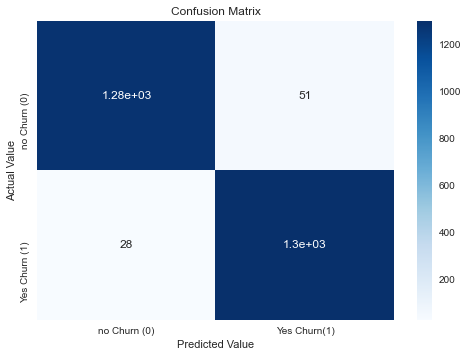

In [77]:
predict_test=predict_model(best_model,raw_score=True)
plot_confusion_matrix(confusion_matrix(predict_test.y,predict_test.Label))

+ <b> Extract X and Y train from pycaret

In [78]:
for i in range(len(s)):
  print(i)
  print(s[i])
  print("")

0
False

1
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

2
False

3
None

4
y

5
None

6
lightgbm

7
True

8
5729    1
7358    1
5269    0
3029    0
6474    1
       ..
2968    0
6545    1
7906    1
735     0
8702    1
Name: y, Length: 2663, dtype: int64

9
box-cox

10
MLUsecase.CLASSIFICATION

11
[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verb

[      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8714  0.9469  0.9936  0.7984  0.8854  0.7428  0.7660
1       0.9003  0.9736  0.9936  0.8374  0.9088  0.8006  0.8149
2       0.8794  0.9658  0.9968  0.8073  0.8921  0.7588  0.7807
3       0.8728  0.9629  0.9904  0.8021  0.8863  0.7455  0.7670
4       0.8969  0.9722  0.9871  0.8365  0.9056  0.7938  0.8071
5       0.8937  0.9735  0.9936  0.8284  0.9035  0.7874  0.8036
6       0.8663  0.9581  0.9614  0.8081  0.8781  0.7326  0.7462
7       0.8873  0.9642  0.9904  0.8213  0.8980  0.7745  0.7915
8       0.8824  0.9655  0.9904  0.8148  0.8940  0.7648  0.7833
9       0.8905  0.9787  0.9904  0.8257  0.9006  0.7809  0.7970
Mean    0.8841  0.9661  0.9887  0.8180  0.8952  0.7682  0.7857
SD      0.0110  0.0087  0.0095  0.0133  0.0094  0.0219  0.0203,       Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9646  0.9931  0.9775  0.9530  0.9651  0.9293  0.9296
1       0.9759  0.9962  0.9871  0.9654  0.9762  0.951

In [81]:
s[30][2][1]

255     0
4717    1
6650    1
4747    0
5526    1
       ..
7382    1
7763    1
5218    1
1346    0
3582    0
Name: y, Length: 6213, dtype: int64

In [82]:
X_train = s[30][1][1]
y_train = s[30][2][1]
feature_names = list(X_train.columns)

+ <b> Shap Value and Feature Importance </b>

In [83]:
import shap

#"raw", "probability", "log_loss",
shap_values = shap.TreeExplainer(best_model,
                                 data = X_train,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_train)

100%|===================| 6212/6213 [00:55<00:00]        

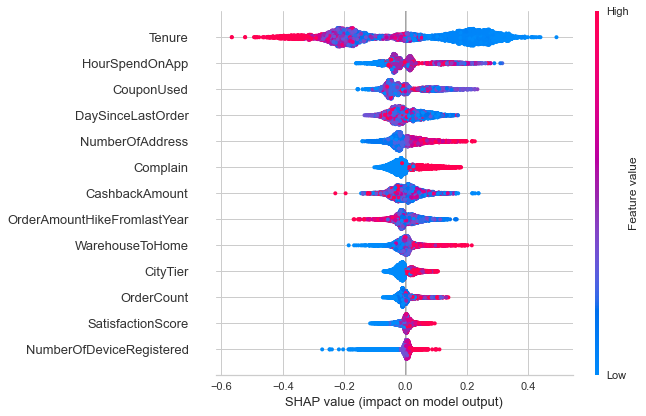

In [84]:
shap.summary_plot(shap_values, X_train,feature_names = feature_names,max_display=30)

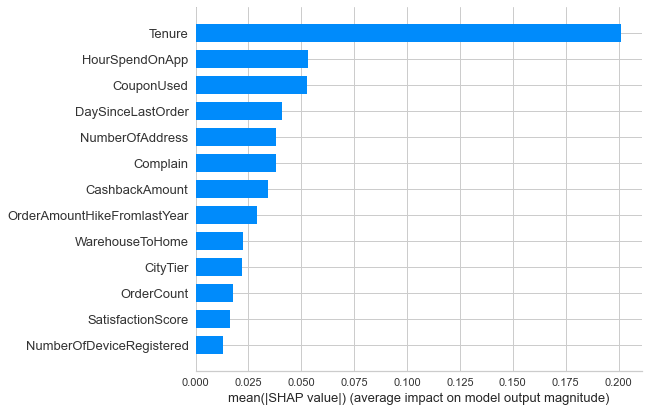

In [85]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

+ <b> Plot Partial Dependence </b>

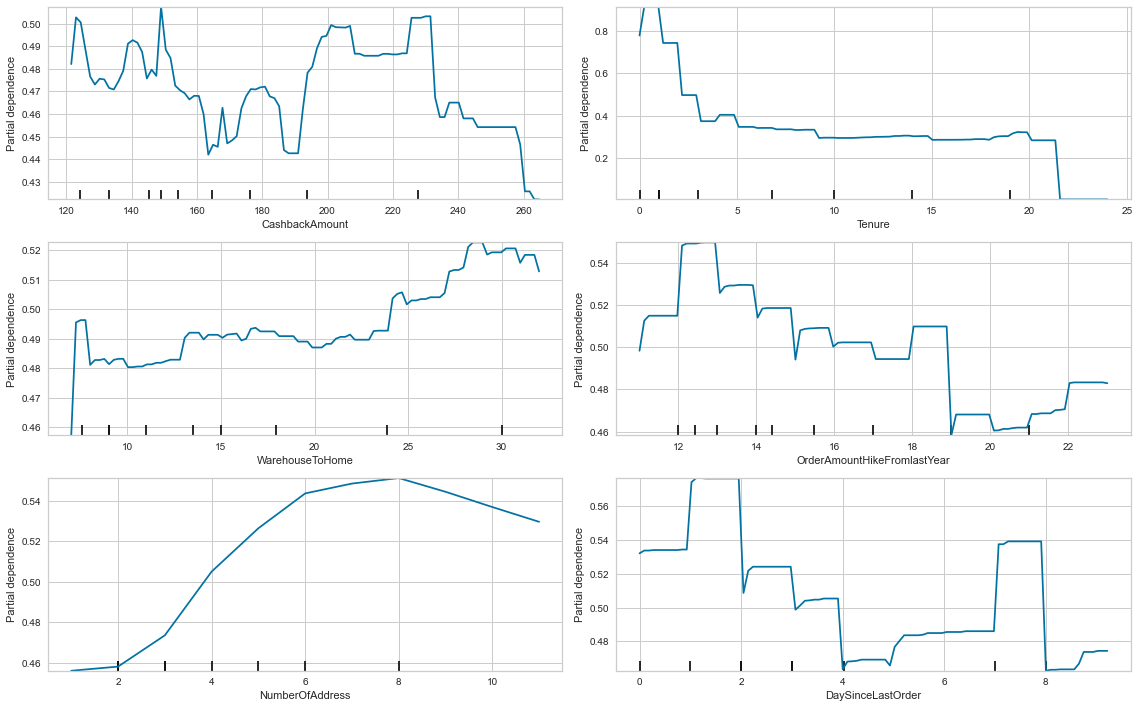

In [87]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

# We try to compare 4 features using partial dependence
fig, ax = plt.subplots(3,2, figsize=(16, 10))
plot_partial_dependence(best_model, X_train,["CashbackAmount"], ax=ax[0,0])
plot_partial_dependence(best_model, X_train,["Tenure"], ax=ax[0,1])
plot_partial_dependence(best_model, X_train,["WarehouseToHome"], ax=ax[1,0])
plot_partial_dependence(best_model, X_train,["OrderAmountHikeFromlastYear"], ax=ax[1,1])
plot_partial_dependence(best_model, X_train,["NumberOfAddress"], ax=ax[2,0])
plot_partial_dependence(best_model, X_train,["DaySinceLastOrder"], ax=ax[2,1])
plt.tight_layout()
plt.show()

+ <b> Launch Business Simulation </b>

In [88]:
#import numpy as np

#np.random.seed(123)

#X_simulasi = list(X_train.sample(1000).index)
#Y_simulasi = y_train[X_simulasi]

#df_simulasi = X_train.loc[X_simulasi]
#df_simulasi["y"] = Y_simulasi
c = [col for col in df_stg3 if '_' in col]
df_stg4 = df_stg3.drop(columns=c)
df_simulasi=df_stg4.copy()
df_simulasi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5350 non-null   int64  
 1   Tenure                       5350 non-null   float64
 2   CityTier                     5350 non-null   int64  
 3   WarehouseToHome              5350 non-null   float64
 4   HourSpendOnApp               5350 non-null   float64
 5   NumberOfDeviceRegistered     5350 non-null   int64  
 6   SatisfactionScore            5350 non-null   int64  
 7   NumberOfAddress              5350 non-null   int64  
 8   Complain                     5350 non-null   int64  
 9   OrderAmountHikeFromlastYear  5350 non-null   float64
 10  CouponUsed                   5350 non-null   float64
 11  OrderCount                   5350 non-null   float64
 12  DaySinceLastOrder            5350 non-null   float64
 13  CashbackAmount    

In [90]:
jumlah_tenure = [2]


for i in jumlah_tenure:
  df_simulasi_y1 = df_simulasi.query("Churn==1")
  y_simulasi_revenue_churn =  [x/0.05 for x in df_simulasi_y1["CashbackAmount"].tolist()]
  df_simulasi_y1["Tenure"] = i
  #df_simulasi_y1["DaySinceLastOrder"] =  j
  df_simulasi_y1["revenue"] = df_simulasi_y1["CashbackAmount"]/0.05
  df_simulasi_y1["CashbackAmount"] = df_simulasi_y1["CashbackAmount"]+25
  prediksi = best_model.predict(df_simulasi_y1.drop(["Churn","revenue"],axis=1))
  df_simulasi_y1["pred"] = prediksi
  revenue_saved = df_simulasi_y1[df_simulasi_y1["pred"] == 0]["revenue"].sum()
  cost= df_simulasi_y1[df_simulasi_y1["pred"] == 0]["CashbackAmount"].sum()
  margin=revenue_saved-cost
      
      
  print(f"Jumlah Churn awal adalah {len(df_simulasi_y1)} orang")
  print(f"Jumlah Churn ketika Tenure = {i} adalah {sum(prediksi)} orang")
  print(f"Potential Revenue kalau bisa diselamatkan ($) {round(revenue_saved,2)}")
  print(f"Cost yang digunakan untuk menyelamatkan customer ($) {round(cost,2)}")
  print(f"margin yang didapatkan setelah menyelamatkan customer ($) {round(margin,2)}")
  print("")

Jumlah Churn awal adalah 912 orang
Jumlah Churn ketika Tenure = 2 adalah 335 orang
Potential Revenue kalau bisa diselamatkan ($) 1751375.8
Cost yang digunakan untuk menyelamatkan customer ($) 101993.79
margin yang didapatkan setelah menyelamatkan customer ($) 1649382.01



Target kita adalah mengurangi churn dan memaksimalkan potential revenue sampai 50%. Dengan simulasi di atas, jika kita dapat mempertahankan customer sampai 2 minggu pertama dan kita berikan cashback extra sampai USD25 per customer yang terprediksi churn, kita dapat memaksimalkan potential revenue sampai dengan USD1,75m dengan cost USD101k. <b>Proyeksi Profit yang didapatkan adalah sebesar USD1,6m</b>